<a href="https://colab.research.google.com/github/Siba00/Flight-Delay-Forecasting/blob/main/ML_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Flight Delay Forecasting**

## Importing Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, RobustScaler
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from scipy import stats

## Importing Dataset

In [26]:
dataset = pd.read_csv('./flight_delay.csv')
dataset.info()
dataset.describe()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675513 entries, 0 to 675512
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Depature Airport         675513 non-null  object 
 1   Scheduled depature time  675513 non-null  object 
 2   Destination Airport      675513 non-null  object 
 3   Scheduled arrival time   675513 non-null  object 
 4   Delay                    675513 non-null  float64
dtypes: float64(1), object(4)
memory usage: 25.8+ MB


,Depature Airport,Scheduled depature time,Destination Airport,Scheduled arrival time,Delay
0,SVO,2015-10-27 07:40:00,HAV,2015-10-27 20:45:00,0.0
1,SVO,2015-10-27 09:50:00,JFK,2015-10-27 20:35:00,2.0
2,SVO,2015-10-27 10:45:00,MIA,2015-10-27 23:35:00,0.0
3,SVO,2015-10-27 12:30:00,LAX,2015-10-28 01:20:00,0.0
4,OTP,2015-10-27 14:15:00,SVO,2015-10-27 16:40:00,9.0


## Label Encoding

In [27]:
objList=['Depature Airport','Destination Airport']
le = LabelEncoder()
for i in objList:
  dataset[i] = le.fit_transform(dataset[i].astype(str))

## Time processing & adding new features

In [28]:
dataset['Scheduled depature time'] = pd.to_datetime(dataset['Scheduled depature time'])
dataset['Scheduled arrival time'] = pd.to_datetime(dataset['Scheduled arrival time'])
dataset['Departure Month'] = dataset['Scheduled depature time'].dt.month
dataset['Departure Day of the Week'] = dataset['Scheduled depature time'].dt.dayofweek
dataset['Departure Year'] = dataset['Scheduled depature time'].dt.year
dataset['Flight Duration'] = (dataset['Scheduled arrival time'] - dataset['Scheduled depature time']).dt.seconds / 60 
dataset.drop(['Scheduled depature time', 'Scheduled arrival time'], axis=1, inplace = True)

## Scaling

In [29]:
# ps. there is no NAN values in the Dataset so we don't need to remove any rows
scaler = RobustScaler()
dataset["Flight Duration"] = scaler.fit_transform(dataset["Flight Duration"].values[:, None])
dataset["Depature Airport"] = scaler.fit_transform(dataset["Depature Airport"].values[:, None])
dataset["Destination Airport"] = scaler.fit_transform(dataset["Destination Airport"].values[:, None])

## Splitting Dataset

In [30]:
train_data = dataset[dataset['Departure Year'] < 2018]
test_data = dataset[dataset['Departure Year'] >= 2018]
train_data.drop(['Departure Year'], axis=1, inplace = True)
test_data.drop(['Departure Year'], axis=1, inplace = True)
x_test = test_data['Flight Duration']
y_test = test_data['Delay']

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### visualizing

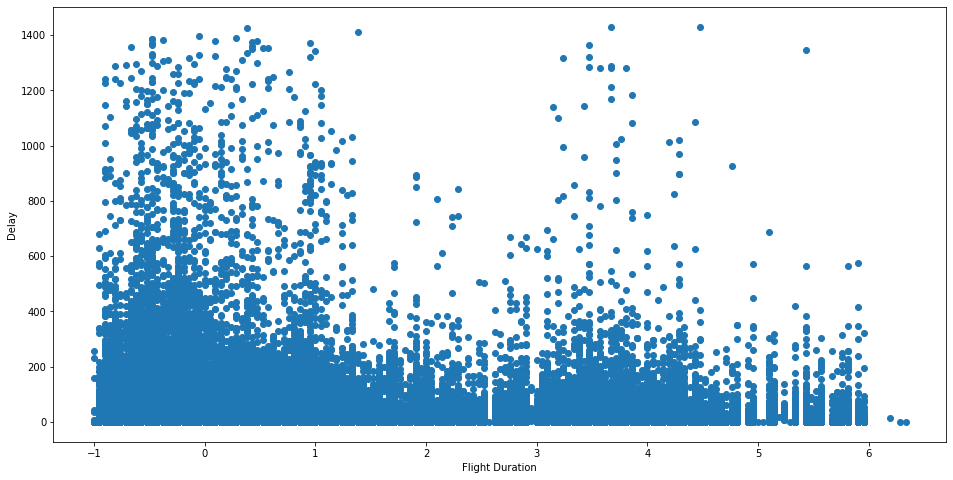

In [31]:
fig, ax = plt.subplots(figsize = (16,8))
ax.scatter(train_data['Flight Duration'], train_data['Delay'])
ax.set_xlabel('Flight Duration')
ax.set_ylabel('Delay')
plt.show()

## Outlier Detection and Removal

In [32]:
#Z_SCORE methode
#outliers in the first month 
threshold = 3
sample = train_data[0:2441]
z = np.abs(stats.zscore(sample))
out_indexes = np.where(z > threshold)
unique_indexes = np.unique(out_indexes[0])
print(f' Number of outliers: {len(unique_indexes)}')


# applying z_score for whole dataset
z = np.abs(stats.zscore(train_data))
out_indexes = np.where(z > threshold)
unique_indexes = np.unique(out_indexes[0])
print(f' Number of outliers: {len(unique_indexes)}\n')

# Removing the outliers
train_data = train_data[(z < 3).all(axis=1)]

 Number of outliers: 95
 Number of outliers: 19970



### visualizing

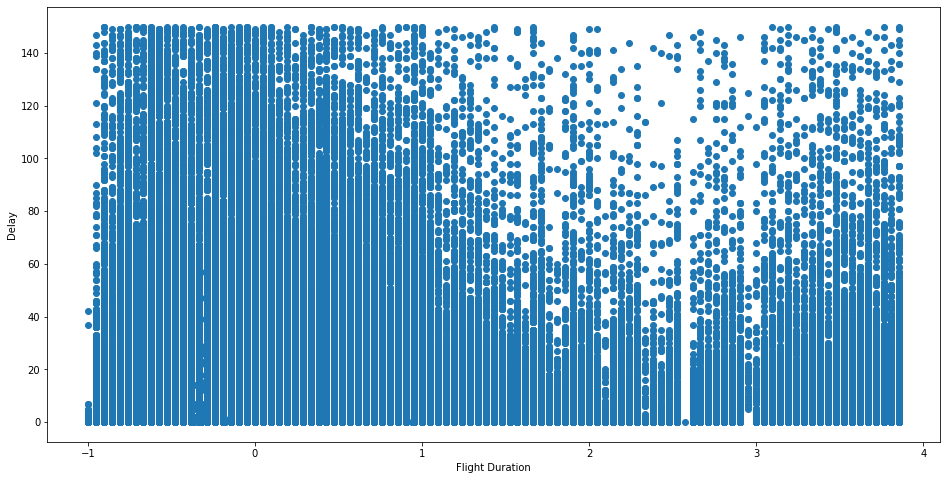

In [33]:
fig, ax = plt.subplots(figsize = (16,8))
ax.scatter(train_data['Flight Duration'], train_data['Delay'])
ax.set_xlabel('Flight Duration')
ax.set_ylabel('Delay')
plt.show()

## Deriving the Train Data

In [34]:
x_train = train_data['Flight Duration']
y_train = y_train = train_data['Delay']

print('X_train dataframs:\n')
print(x_train.head().to_string())

X_train dataframs:

4   -0.142857
5    0.047619
7    1.714286
8    3.285714
9    0.857143


## Regression Models

### Linear Regression

In [35]:
x_train=np.asarray(x_train).astype(np.float32)
y_train=np.asarray(y_train).astype(np.float32)
x_test=np.asarray(x_test).astype(np.float32)
y_test=np.asarray(y_test).astype(np.float32)

x_train=x_train.reshape(-1, 1)
x_test=x_test.reshape(-1,1)
y_train=y_train.reshape(-1, 1)
y_test=y_test.reshape(-1,1)

LG = LinearRegression()
LG.fit(x_train, y_train)
print(f"Model intercept : {regressor.intercept_}")
print(f"Model coefficients : {regressor.coef_}")

y_pred = regressor.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score for linear regression on test data:', metrics.r2_score(y_train, train_pred))

Model intercept : [6.7910337]
Model coefficients : [[1.6220154]]
Mean Absolute Error: 11.400016
Mean Squared Error: 1598.7668
Root Mean Squared Error: 39.98458
R2 score for linear regression on test data: 0.00929296516621303


### Lasso regression

In [36]:
print('Lasso regression\n')                                                       
lasso = Lasso()
gridParams = {"alpha": np.linspace(0.1, 4, 5)}
grid = GridSearchCV(lasso, gridParams, scoring='neg_mean_squared_error',verbose=1, n_jobs=-1, cv=5)
grid.fit(x_train, y_train)           
print("Best params:", grid.best_params_)
print("Root Mean Squared Error for lasso regression:", metrics.mean_squared_error(y_test, grid.predict(x_test), squared=False))
print("Mean Absolute Error for lasso regression:", metrics.mean_absolute_error(y_test, grid.predict(x_test)))
print("R2 score for lasso regression:", metrics.r2_score(y_test, grid.predict(x_test)),'\n')

pred_train = grid.predict(x_train)
print(f"Root Mean Squared Error for lasso regression on train dataset:", metrics.mean_squared_error(y_train, pred_train, squared=False))
print(f"Mean Absolute Error for lasso regression on train dataset:", metrics.mean_absolute_error(y_train, pred_train))
print("R2 score for lasso regression on train dataset:", metrics.r2_score(y_train, pred_train),'\n')

Lasso regression

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best params: {'alpha': 0.1}
Root Mean Squared Error for lasso regression: 39.98578
Mean Absolute Error for lasso regression: 11.397266
R2 score for lasso regression: 0.0024389244975807634 

Root Mean Squared Error for lasso regression on train dataset: 17.068401
Mean Absolute Error for lasso regression on train dataset: 9.389032
R2 score for lasso regression on train dataset: 0.007724548217838412 



[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.7s finished


### Polynomial regression

In [38]:
degrees = [1, 2, 3, 4, 5, 6]
print('Polynomial regression\n')  
for degree in degrees:
    poly = PolynomialFeatures(degree)
    poly.fit(x_train)
    polyXtrain = poly.transform(x_train)
    polyXtest = poly.transform(x_test)
    lr = LinearRegression()
    lr.fit(polyXtrain, y_train)
    pred = lr.predict(polyXtest)
    print(f"Root Mean Squared Error for polynomial regression with degree {degree} :", metrics.mean_squared_error(y_test, pred, squared=False))
    print(f"Mean Absolute Error for polynomial regression with degree {degree} :", metrics.mean_absolute_error(y_test, pred))
    print(f"R2 score  for polynomial regression with degree {degree} :", metrics.r2_score(y_test, pred),'\n')

    pred_train = lr.predict(polyXtrain)
    print(f"Root Mean Squared Error for polynomial regression with degree {degree} on train dataset:", metrics.mean_squared_error(y_train, pred_train,squared=False))
    print(f"Mean Absolute Error for polynomial regression with degree {degree} on train dataset:", metrics.mean_absolute_error(y_train, pred_train))
    print(f"R2 score  for polynomial regression with degree {degree} :", metrics.r2_score(y_train, pred_train))

Polynomial regression

Root Mean Squared Error for polynomial regression with degree 1 : 39.98458
Mean Absolute Error for polynomial regression with degree 1 : 11.399956
R2 score  for polynomial regression with degree 1 : 0.002498850031917743 

Root Mean Squared Error for polynomial regression with degree 1 on train dataset: 17.068062
Mean Absolute Error for polynomial regression with degree 1 on train dataset: 9.38418
R2 score  for polynomial regression with degree 1 : 0.007763864557006728
Root Mean Squared Error for polynomial regression with degree 2 : 39.980263
Mean Absolute Error for polynomial regression with degree 2 : 11.435043
R2 score  for polynomial regression with degree 2 : 0.002714202494798257 

Root Mean Squared Error for polynomial regression with degree 2 on train dataset: 17.064926
Mean Absolute Error for polynomial regression with degree 2 on train dataset: 9.383561
R2 score  for polynomial regression with degree 2 : 0.0081283985820777
Root Mean Squared Error for pol